# **TASK 1**

Objective: Product Data Extraction and Analysis

Task: Import and analyze sales data to identify top products; create
visualizations.

Deliverable: List of best-selling and trending products with visualizations.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Order_Data_meriskill.csv to Order_Data_meriskill.csv


In [ ]:
sales_data = pd.read_csv('Order_Data_meriskill.csv')

<ipython-input-6-5e51c5b4748b>:1: DtypeWarning: Columns (3,10) have mixed types. Specify dtype option on import or set low_memory=False.
  sales_data = pd.read_csv('Order_Data_meriskill.csv')


In [ ]:
print(sales_data.dtypes)


OrderID               object
Region                object
Country               object
CustID                object
Customer_Name         object
ProductSKU            object
Product_Category      object
OrderLineItem          int64
OrderQuantity        float64
ProductCost          float64
ProductPrice          object
OrderDate             object
AcquisitionSource     object
TransactionID         object
Fraud                 object
PaymentMethod         object
CardType              object
Gender                object
dtype: object


In [ ]:
# Convert OrderQuantity and ProductPrice to numeric
sales_data['OrderQuantity'] = pd.to_numeric(sales_data['OrderQuantity'], errors='coerce')
sales_data['ProductPrice'] = pd.to_numeric(sales_data['ProductPrice'], errors='coerce')

# Check for any NaN values introduced due to invalid conversions
print(sales_data[['OrderQuantity', 'ProductPrice']].isna().sum())

OrderQuantity    0
ProductPrice     1
dtype: int64


In [ ]:
# Add a new column for sales value
sales_data['SalesValue'] = sales_data['OrderQuantity'] * sales_data['ProductPrice']

# Group by ProductSKU to calculate total sales
best_sellers = sales_data.groupby('ProductSKU')['SalesValue'].sum().sort_values(ascending=False)

# Display top 10 best-selling products
print(best_sellers.head(10))


ProductSKU
BK-M68B-46    1.241754e+06
BK-M68B-42    1.233557e+06
BK-M68S-38    1.211780e+06
BK-M68S-46    1.176566e+06
BK-M68B-38    1.165937e+06
BK-M68S-42    1.133067e+06
BK-R89B-52    6.893738e+05
BK-R89R-58    6.610134e+05
BK-R89B-48    6.413794e+05
BK-R93R-48    6.405103e+05
Name: SalesValue, dtype: float64


<ipython-input-10-71dcc23b99ed>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_products.index, y=top_10_products.values, palette='viridis')


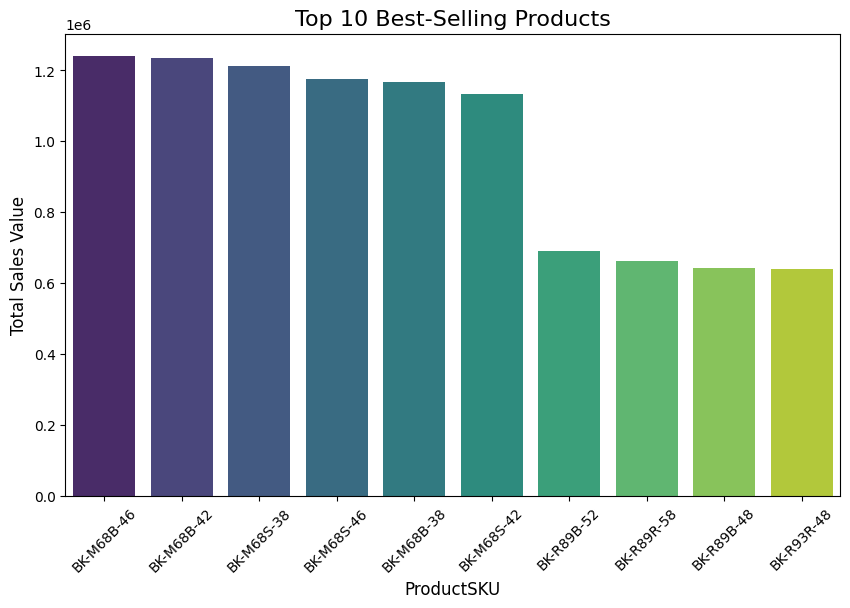

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract the top 10 products
top_10_products = best_sellers.head(10)

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_products.index, y=top_10_products.values, palette='viridis')
plt.title('Top 10 Best-Selling Products', fontsize=16)
plt.xlabel('ProductSKU', fontsize=12)
plt.ylabel('Total Sales Value', fontsize=12)
plt.xticks(rotation=45)
plt.show()


# **TASK 2**

Objective: Visualization of Best-Selling Products

Task: Create detailed charts and graphs of best-selling products.

Deliverable: Visualizations and report on best-selling products.

 The goal is to determine products with the highest sales growth or engagement over the past week.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
# Convert OrderDate to datetime for filtering
sales_data['OrderDate'] = pd.to_datetime(sales_data['OrderDate'])



ValueError: time data "13-01-2020" doesn't match format "%m-%d-%Y", at position 12. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

The ValueError arises because the OrderDate column contains inconsistent or invalid date formats that pd.to_datetime cannot parse directly. Here's a robust approach to handle this issue:

Step 1: Inspect OrderDate

# Identify problematic entries in OrderDate:

In [ ]:
# Find rows where conversion fails
invalid_dates = sales_data[~sales_data['OrderDate'].apply(lambda x: isinstance(pd.to_datetime(x, errors='coerce'), pd.Timestamp))]
print("Invalid or inconsistent dates:")
print(invalid_dates)

<ipython-input-13-c97631a9f81a>:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  invalid_dates = sales_data[~sales_data['OrderDate'].apply(lambda x: isinstance(pd.to_datetime(x, errors='coerce'), pd.Timestamp))]


Invalid or inconsistent dates:
      OrderID  Region Country CustID Customer_Name          ProductSKU  \
7466  SO52614  France  France      R       WB-H098  Plant Care & Seeds   

     Product_Category  OrderLineItem  OrderQuantity  ProductCost  \
7466                3              2         1.8663         4.99   

      ProductPrice     OrderDate AcquisitionSource      TransactionID  Fraud  \
7466           NaN  Google-ads\r               NaN  E3514276256212068  False   

     PaymentMethod CardType Gender  SalesValue  
7466    CREDITCARD     VISA      M         NaN  


# Step 2: Normalize Mixed Formats

Use pd.to_datetime with errors='coerce' to convert valid dates while handling invalid ones gracefully:

In [ ]:


# Convert OrderDate with mixed formats to datetime
# Converting datetime-like values
sales_data['OrderDate'] = pd.to_datetime(sales_data['OrderDate'], errors='coerce', dayfirst=True)

# Display results
print(sales_data)


       OrderID          Region         Country CustID    Customer_Name  \
0      SO45080       Northwest   United States  14657      JOHN THOMAS   
1      SO45079       Southwest   United States  29255  KYLE WASHINGTON   
2      SO45082       Australia       Australia  11455        ROSS SANZ   
3      SO45081          Canada          Canada  26782       SETH LEWIS   
4      SO45083  United Kingdom  United Kingdom  14947   ALEJANDRO CHEN   
...        ...             ...             ...    ...              ...   
55905  SO74143  United Kingdom  United Kingdom  28517    TROY GONZALEZ   
55906  SO74143  United Kingdom  United Kingdom  28517    TROY GONZALEZ   
55907  SO74143  United Kingdom  United Kingdom  28517    TROY GONZALEZ   
55908  SO74124          France          France  21676      VALERIE GUO   
55909  SO74124          France          France  21676      VALERIE GUO   

       ProductSKU    Product_Category  OrderLineItem  OrderQuantity  \
0      BK-R50B-58              Plants   

# Step 3: Handle Invalid Dates

Replace invalid dates (NaT) with a default value, remove them, or flag them:

In [ ]:
# OR drop rows with invalid dates

sales_data.dropna(subset=['OrderDate'], inplace=True)

print(sales_data)

       OrderID          Region         Country CustID      Customer_Name  \
0      SO45080       Northwest   United States  14657        JOHN THOMAS   
1      SO45079       Southwest   United States  29255    KYLE WASHINGTON   
2      SO45082       Australia       Australia  11455          ROSS SANZ   
3      SO45081          Canada          Canada  26782         SETH LEWIS   
4      SO45083  United Kingdom  United Kingdom  14947     ALEJANDRO CHEN   
...        ...             ...             ...    ...                ...   
52574  SO72753       Northwest   United States  13857  VICTORIA THOMPSON   
52575  SO72753       Northwest   United States  13857  VICTORIA THOMPSON   
52576  SO72753       Northwest   United States  13857  VICTORIA THOMPSON   
52577  SO72756  United Kingdom  United Kingdom  21824         WARREN SHE   
52578  SO72756  United Kingdom  United Kingdom  21824         WARREN SHE   

       ProductSKU    Product_Category  OrderLineItem  OrderQuantity  \
0      BK-R50B-5

# Step 4: Reformat Dates
Convert all dates into a consistent format, such as YYYY-MM-DD:

In [ ]:
sales_data['OrderDate'] = pd.to_datetime(sales_data['OrderDate'])
print(sales_data['OrderDate'])

0       2020-01-01
1       2020-01-01
2       2020-01-01
3       2020-01-01
4       2020-02-01
           ...    
52574   2022-12-06
52575   2022-12-06
52576   2022-12-06
52577   2022-12-06
52578   2022-12-06
Name: OrderDate, Length: 22221, dtype: datetime64[ns]


In [ ]:
# Filter for the last week
last_days = pd.Timestamp.now() - pd.Timedelta(days=2000)
recent_sales = sales_data[sales_data['OrderDate'] >= last_days]

# Calculate total sales and engagement metrics
recent_sales['SalesValue'] = recent_sales['OrderQuantity'] * recent_sales['ProductPrice']
product_summary = recent_sales.groupby('ProductSKU').agg(
    TotalSales=('SalesValue', 'sum'),
    TotalQuantity=('OrderQuantity', 'sum'),
    OrderCount=('TransactionID', 'nunique')
).reset_index()

print(product_summary)

     ProductSKU  TotalSales  TotalQuantity  OrderCount
0       BC-M005    15704.28         1572.0         782
1       BC-R205    12001.65         1335.0         671
2    BK-M18B-40     9179.83           17.0          17
3    BK-M18B-42    11339.79           21.0          21
4    BK-M18B-44    11339.79           21.0          21
..          ...         ...            ...         ...
125     TT-T092     5369.24         1076.0         539
126   VE-C304-L     4318.00           68.0          68
127   VE-C304-M     4889.50           77.0          76
128   VE-C304-S     4445.00           70.0          70
129     WB-H098    16252.43         3257.0        1624

[130 rows x 4 columns]


# Feature Engineering

In [ ]:
# Add historical sales data for comparison
# Assume historical data is loaded in `historical_sales` DataFrame
historical_sales = sales_data[sales_data['OrderDate'] < last_week]

# Aggregate historical data
historical_summary = historical_sales.groupby('ProductSKU').agg(
    HistoricalSales=('SalesValue', 'sum'),
    HistoricalQuantity=('OrderQuantity', 'sum')
).reset_index()

# Merge historical data with recent data
merged_data = pd.merge(product_summary, historical_summary, on='ProductSKU', how='left').fillna(0)

# Calculate sales growth and engagement metrics
merged_data['SalesGrowth'] = (merged_data['TotalSales'] - merged_data['HistoricalSales']) / (merged_data['HistoricalSales'] + 1e-5)
merged_data['QuantityGrowth'] = (merged_data['TotalQuantity'] - merged_data['HistoricalQuantity']) / (merged_data['HistoricalQuantity'] + 1e-5)

print(merged_data)


     ProductSKU  TotalSales  TotalQuantity  OrderCount  HistoricalSales  \
0       BC-M005    15704.28         1572.0         782              0.0   
1       BC-R205    12001.65         1335.0         671              0.0   
2    BK-M18B-40     9179.83           17.0          17              0.0   
3    BK-M18B-42    11339.79           21.0          21              0.0   
4    BK-M18B-44    11339.79           21.0          21              0.0   
..          ...         ...            ...         ...              ...   
125     TT-T092     5369.24         1076.0         539              0.0   
126   VE-C304-L     4318.00           68.0          68              0.0   
127   VE-C304-M     4889.50           77.0          76              0.0   
128   VE-C304-S     4445.00           70.0          70              0.0   
129     WB-H098    16252.43         3257.0        1624              0.0   

     HistoricalQuantity   SalesGrowth  QuantityGrowth  
0                   0.0  1.570428e+09     1

# Build an ML Model

In [ ]:
# Define target variable: IsTrending (1 if sales growth > threshold, else 0)
merged_data['IsTrending'] = (merged_data['SalesGrowth'] > 0.5).astype(int)




In [ ]:
print(merged_data[['TotalSales', 'SalesGrowth', 'IsTrending']])


     TotalSales   SalesGrowth  IsTrending
0      15704.28  1.570428e+09           1
1      12001.65  1.200165e+09           1
2       9179.83  9.179830e+08           1
3      11339.79  1.133979e+09           1
4      11339.79  1.133979e+09           1
..          ...           ...         ...
125     5369.24  5.369240e+08           1
126     4318.00  4.318000e+08           1
127     4889.50  4.889500e+08           1
128     4445.00  4.445000e+08           1
129    16252.43  1.625243e+09           1

[130 rows x 3 columns]


In [ ]:
# Define features and target
features = ['TotalSales', 'TotalQuantity', 'OrderCount', 'SalesGrowth', 'QuantityGrowth']
X = merged_data[features]
y = merged_data['IsTrending']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        26

    accuracy                           1.00        26
   macro avg       1.00      1.00      1.00        26
weighted avg       1.00      1.00      1.00        26



# Visualize Trending Products

In [ ]:
# Identify trending products
trending_products = merged_data[merged_data['IsTrending'] == 1].sort_values(by='SalesGrowth', ascending=False)




<ipython-input-76-a6ff34332fd1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=trending_products['ProductSKU'][:10], y=trending_products['SalesGrowth'][:10], palette='coolwarm')


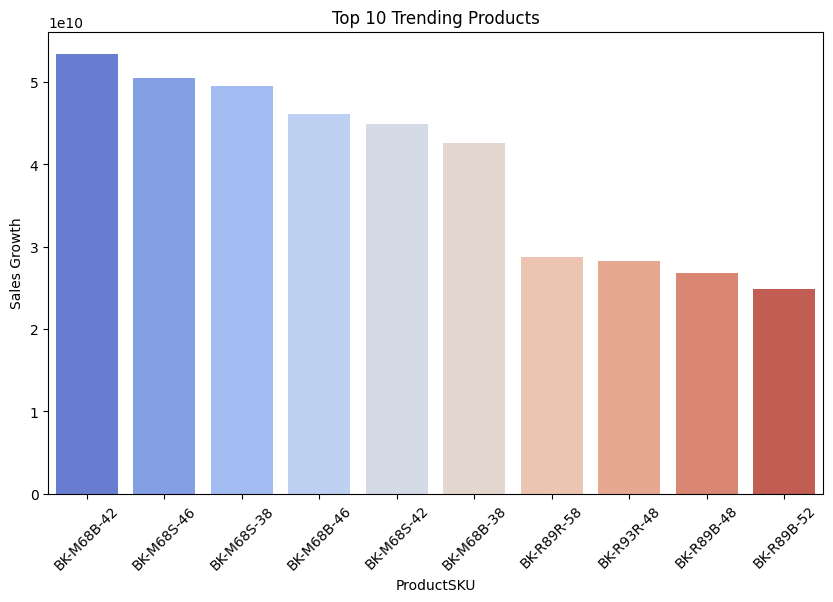

In [ ]:
# Plot top 10 trending products
plt.figure(figsize=(10, 6))
sns.barplot(x=trending_products['ProductSKU'][:10], y=trending_products['SalesGrowth'][:10], palette='coolwarm')
plt.title('Top 10 Trending Products')
plt.xlabel('ProductSKU')
plt.ylabel('Sales Growth')
plt.xticks(rotation=45)
plt.show()

# TASK 3

Objective: Customer Data Extraction and Segmentation

Task: Import and segment customer data; analyze for top products
and trends.

Deliverable: Segmented customer data and insights.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Convert OrderDate to datetime
sales_data['OrderDate'] = pd.to_datetime(sales_data['OrderDate'])

# Calculate Recency (days since the last transaction)
sales_data['Recency'] = (pd.Timestamp.now() - sales_data['OrderDate']).dt.days

# Calculate Total Spend for each order
sales_data['TotalSpend'] = sales_data['OrderQuantity'] * sales_data['ProductPrice']

# Aggregate data to customer level
customer_data = sales_data.groupby('CustID').agg(
    InteractionCount=('TransactionID', 'count'),  # Total transactions
    TotalSpend=('TotalSpend', 'sum'),  # Total spending
    Recency=('Recency', 'min')  # Most recent transaction
).reset_index()

print(customer_data.head())


  CustID  InteractionCount  TotalSpend  Recency
0  11001                 4    592.6042      726
1  11019                 7    360.6316      726
2  11028                 1    742.3500      819
3  11030                 2    759.6384      727
4  11032                 2    759.6384      757


Normalize Features for Clustering

In [ ]:
# Features to be used for clustering
features = customer_data[['InteractionCount', 'TotalSpend', 'Recency']]

# Standardize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [ ]:
print(features.shape)

(9020, 3)


Apply K-Means Clustering

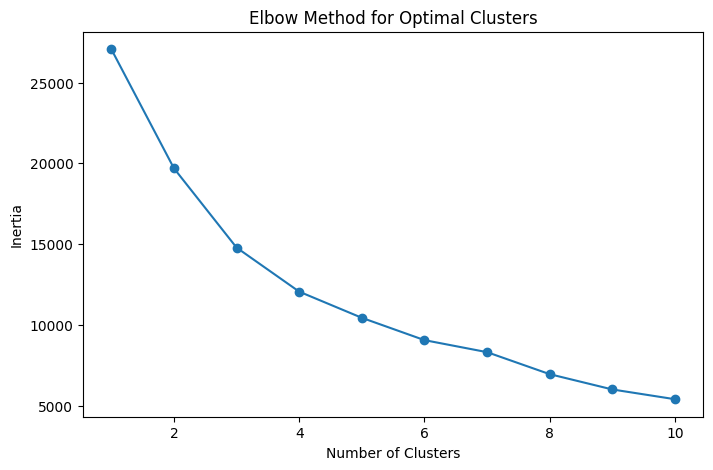

In [ ]:
# Determine the optimal number of clusters using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Apply K-Means with the optimal number of clusters
optimal_clusters = 3  # Adjust based on the elbow plot
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(features_scaled)


Analyze Clusters

In [ ]:
# Summarize each cluster
cluster_summary = customer_data.groupby('Cluster').agg(
    AvgInteractionCount=('InteractionCount', 'mean'),
    AvgTotalSpend=('TotalSpend', 'mean'),
    AvgRecency=('Recency', 'mean'),
    CustomerCount=('CustID', 'count')
).reset_index()

print(cluster_summary)


   Cluster  AvgInteractionCount  AvgTotalSpend   AvgRecency  CustomerCount
0        0             4.166667    2560.998590  1011.920024           1638
1        1             1.539781    1409.713224  1388.916058           2740
2        2             2.407798     380.338908   966.716286           4642


In [ ]:
print(cluster_summary['Cluster'].shape)

(3,)


Visualize Clusters

In [ ]:
pairplot_data = pd.DataFrame(features_scaled, columns=['InteractionCount', 'TotalSpend', 'Recency'])
pairplot_data['Cluster'] = customer_data['Cluster'].reset_index(drop=True)  # Align indices


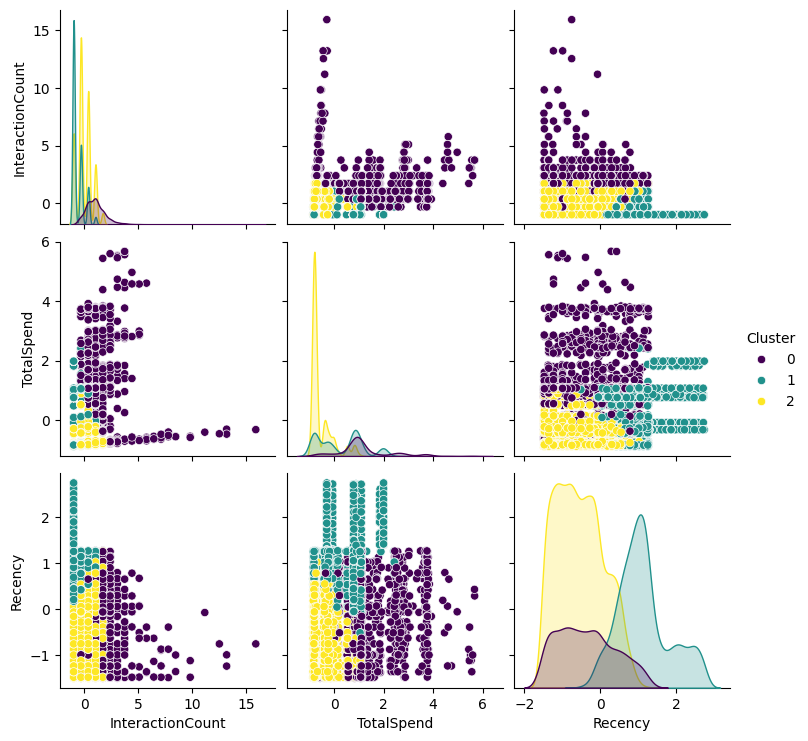

In [ ]:
sns.pairplot(
    pairplot_data,
    hue='Cluster',
    palette='viridis'
)


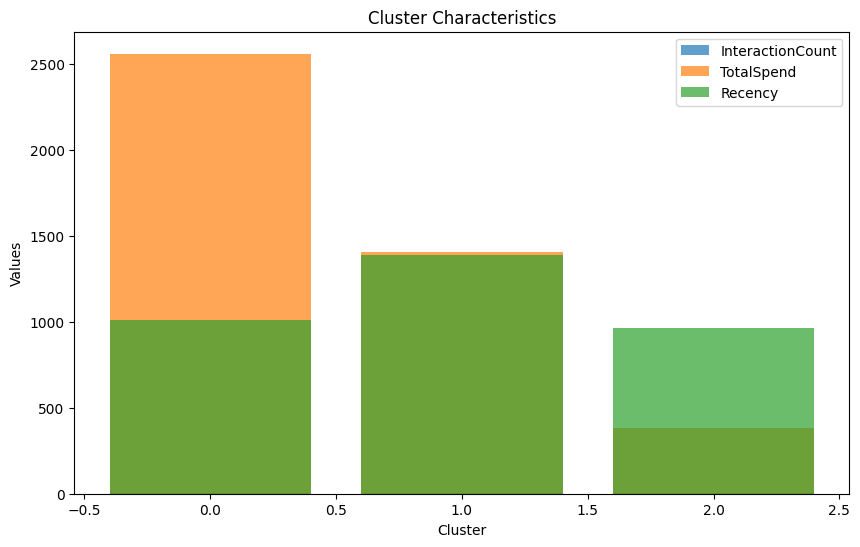

In [ ]:

plt.figure(figsize=(10, 6))
for i, col in enumerate(['InteractionCount', 'TotalSpend', 'Recency']):
    plt.bar(
        cluster_summary['Cluster'],
        cluster_summary[f'Avg{col}'],
        alpha=0.7,
        label=col
    )
plt.xlabel('Cluster')
plt.ylabel('Values')
plt.title('Cluster Characteristics')
plt.legend()
plt.show()


# TASK 4

Objective: Trend Analysis for Customer Segments

Task: Analyze product trends for each customer segment and create
visualizations.

Deliverable: Report on product trends with visualizations.

# Top Products Identification

In [ ]:
# Group by Customer Segment and ProductSKU to calculate total sales
top_products = sales_data.groupby(['CustID', 'ProductSKU']).agg(
    TotalSales=('ProductPrice', 'sum'),
    TotalQuantity=('OrderQuantity', 'sum')
).reset_index()

# Find the top products for each customer segment
top_products_per_segment = top_products.groupby('CustID').apply(
    lambda x: x.sort_values('TotalSales', ascending=False).head(3)
).reset_index(drop=True)

print("Top Products Per Segment:")
print(top_products_per_segment)


Top Products Per Segment:
      CustID  ProductSKU  TotalSales  TotalQuantity
0      11001  BK-R19B-44    539.9900            1.0
1      11001     HL-U509     33.6442            1.0
2      11001     BC-R205      8.9900            1.0
3      11019   SH-W890-M     69.9900            1.0
4      11019   SJ-0194-X     53.9900            1.0
...      ...         ...         ...            ...
19285  29468   HL-U509-R     34.9900            1.0
19286  29468     CA-1098      8.6442            2.0
19287  29473  BK-T79U-50   2384.0700            1.0
19288  29473   HL-U509-R     34.9900            1.0
19289  29479  BK-M68B-38   2049.0982            1.0

[19290 rows x 4 columns]


<ipython-input-94-ee8421844af8>:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_products_per_segment = top_products.groupby('CustID').apply(


Trend Analysis

In [ ]:
# Aggregate sales data by month
sales_data['Month'] = sales_data['OrderDate'].dt.to_period('M')
trend_analysis = sales_data.groupby(['Month', 'ProductSKU']).agg(
    TotalSales=('ProductPrice', 'sum'),
    TotalQuantity=('OrderQuantity', 'sum')
).reset_index()

print("Trend Analysis Data:")
print(trend_analysis.head())


Trend Analysis Data:
     Month  ProductSKU  TotalSales  TotalQuantity
0  2020-01  BK-M68B-38   6147.2946            3.0
1  2020-01  BK-M68B-42   2049.0982            1.0
2  2020-01  BK-M68B-46   8196.3928            4.0
3  2020-01  BK-M68S-42   2071.4196            1.0
4  2020-01  BK-M68S-46   6214.2588            3.0


Visualization

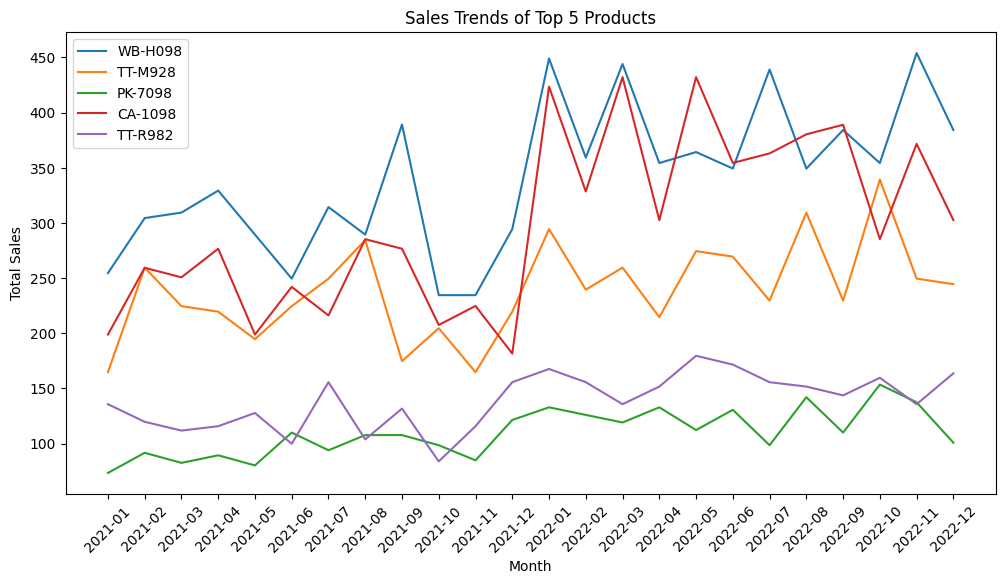

In [ ]:
# Plot sales trends for the top 5 products
top_products_list = top_products['ProductSKU'].value_counts().head(5).index

plt.figure(figsize=(12, 6))
for product in top_products_list:
    product_trend = trend_analysis[trend_analysis['ProductSKU'] == product]
    plt.plot(product_trend['Month'].astype(str), product_trend['TotalSales'], label=product)

plt.title("Sales Trends of Top 5 Products")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.legend()
plt.xticks(rotation=45)
plt.show()


Visualization by Customer Segment

In [ ]:
# Create a pivot table for visualization
segment_pivot = top_products_per_segment.pivot_table(
    index='CustID', columns='ProductSKU', values='TotalSales', aggfunc='sum', fill_value=0
)

# Heatmap visualization of top products by customer segment
plt.figure(figsize=(10, 8))
sns.heatmap(segment_pivot, cmap='coolwarm', annot=True, fmt='.0f')
plt.title("Top Products by Customer Segment")
plt.xlabel("Product SKU")
plt.ylabel("Customer Segment")
plt.show()


# Clustering Analysis on Trends (Optional ML Enhancement)

If you want to cluster customers or products based on trends, you can apply KMeans Clustering:

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Features for clustering
trend_features = data.groupby('ProductSKU').agg(
    AvgSales=('ProductPrice', 'mean'),
    TotalQuantity=('OrderQuantity', 'sum'),
    TotalOrders=('TransactionID', 'nunique')
).reset_index()

# Normalize the data
scaler = StandardScaler()
trend_scaled = scaler.fit_transform(trend_features[['AvgSales', 'TotalQuantity', 'TotalOrders']])

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
trend_features['Cluster'] = kmeans.fit_predict(trend_scaled)

print("Trend Features with Clusters:")
print(trend_features.head())

# Visualization
sns.pairplot(trend_features, hue='Cluster', palette='viridis')
plt.suptitle("Clustering of Products Based on Trends", y=1.02)
plt.show()


# TASK 5
TO BE DONE IN VISUALIZATION TOOL

Objective: Reporting and Presentation Preparation

Task: Prepare and present comprehensive reports with insights and
recommendations.

Deliverable: Final report and presentation for landing page and
marketing strategies.